## Project Overview:
 
Objective is to build a data model to predict the probability of default, and choosing a cut-off based on which is suitable. Alternatively using a modelling technique which gives binary output. Data from 2007-2015 will be used because most of the loans from that period have already been repaid or defaulted on.

In [1]:
#install/import packages libraries
from sklearn.metrics import make_scorer, accuracy_score # for accuracy
from sklearn.model_selection import train_test_split # for splitting the train-test data
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn.linear_model import LogisticRegression # regression
from sklearn.metrics import classification_report # to create all accuracy matrices
from sklearn.model_selection import GridSearchCV # hyper parameter optimization
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
from sklearn.metrics import accuracy_score # accuracy score / accuracy
from sklearn import preprocessing # EDA

import matplotlib.pylab as pylab # visualization
import matplotlib.pyplot as plt # visualization

from pandas import get_dummies # EDA

import matplotlib as mpl  # visualization
import xgboost as xgb # EDA
import seaborn as sns # visualization
import pandas as pd # EDA
import numpy as np # EDA
import matplotlib # visualization
import warnings # EDA
import sklearn # machine learning
import scipy  # EDA
import sys # EDA
import csv # EDA
import os # to work with the the work libraries / system related variables

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('C://Users//vin//Desktop//Anu//Imarticus Project//BankLending.csv',encoding='latin1',low_memory=False)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,01/12/2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01/12/2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01/12/2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01/12/2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01/12/2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,01/01/2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0,Sep-04,0,NaN,77.0,9,1,14037,82.1,15,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,Jan-16,332.10,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,01/01/2015,n,NaN,home_improvement,Home improv

In [1]:
from pandas_profiling import ProfileReport
prof=ProfileReport(data)
prof

KeyboardInterrupt: 

# Statistical Analysis

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,855969.0,3.476269e+07,2.399418e+07,70699.00,1.079273e+07,3.697532e+07,5.803559e+07,7.351969e+07
loan_amnt,855969.0,1.474557e+04,8.425340e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt,855969.0,1.473238e+04,8.419472e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,855969.0,1.470006e+04,8.425805e+03,0.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
int_rate,855969.0,1.319232e+01,4.368365e+00,5.32,9.990000e+00,1.299000e+01,1.599000e+01,2.899000e+01
installment,855969.0,4.362381e+02,2.437269e+02,15.69,2.605500e+02,3.825500e+02,5.715600e+02,1.445460e+03
annual_inc,855969.0,7.507119e+04,6.426447e+04,0.00,4.500000e+04,6.500000e+04,9.000000e+04,9.500000e+06
dti,855969.0,1.812216e+01,1.742363e+01,0.00,1.188000e+01,1.761000e+01,2.390000e+01,9.999000e+03
delinq_2yrs,855969.0,3.116211e-01,8.571894e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
inq_last_6mths,855969.0,6.809148e-01,9.640331e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00


# Data Visualisation

## Defaulter/Non-Defaulter Count

In [18]:
data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [19]:
Non_Default = round(data['default_ind'].value_counts()[0]/len(data) * 100, 2)

Default = round(data['default_ind'].value_counts()[1]/len(data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(Non_Default))
print('Default Customer : {} % of the dataset'.format(Default))

Non_Default Customer : 94.57 % of the dataset
Default Customer : 5.43 % of the dataset


Text(0.5, 1.0, 'Default/Non-Default')

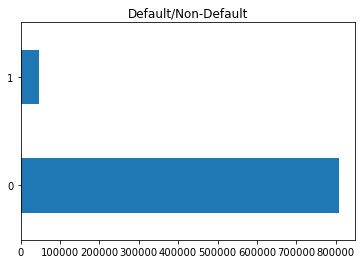

In [20]:
data.default_ind.value_counts().plot(kind='barh')
plt.title("Default/Non-Default")

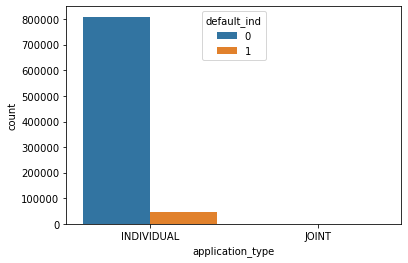

In [21]:
# generate a count plot for the type of loan applications
sns.countplot('application_type',data=data,hue='default_ind')

<font color='royalblue'> We can see here clearly that the organization is mainly dealing with the individual loan applications and the joint loan applications are not entertained well.

# Purpose wise count

<Figure size 1008x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

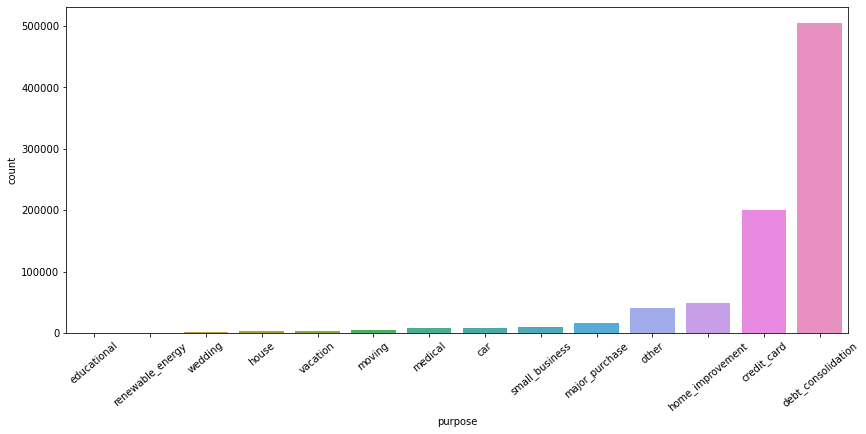

In [22]:
plt.figure(figsize=(14,6))
sns.countplot(x='purpose',data=data,order=data['purpose'].value_counts().sort_values().index);
plt.xticks(rotation=40)

<font color='royalblue'> We can see here that the for debt cosolidation purpose people takes more loan from organization 

# Grade wise defaulter count

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'grade')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'grade Wise Defaulters')

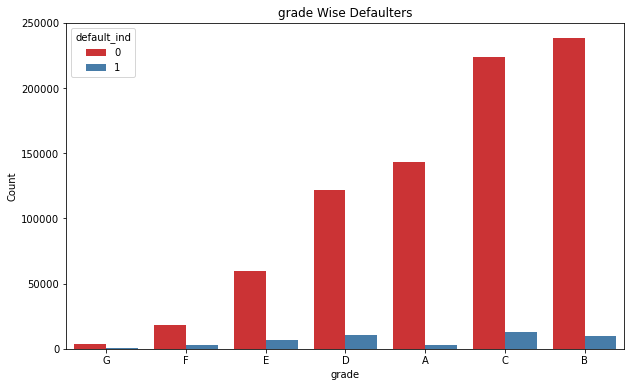

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade',hue='default_ind', data=data,palette="Set1",order=data['grade'].value_counts().sort_values().index)
plt.xlabel('grade')
plt.ylabel('Count')
plt.title('grade Wise Defaulters')
plt.show()

<font color='royalblue'> It is observed that grage B applicants received more number of loans however, the number of defaulters is higher in grade C and grade D applicants.

# Term wise defaulter count

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'term')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'grade Wise Defaulters')

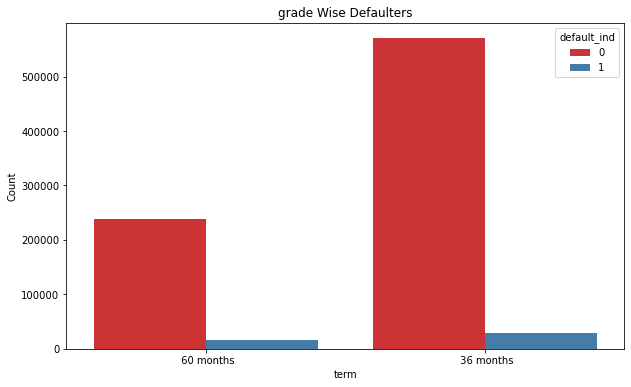

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='term',hue='default_ind', data=data,palette="Set1",order=data['term'].value_counts().sort_values().index)
plt.xlabel('term')
plt.ylabel('Count')
plt.title('grade Wise Defaulters')
plt.show()

<font color='royalblue'> here from this graph we clearly observe that if the term is less then there will be chances of high defaulters

# Countplot of grade Vs int rate

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x286af8a7ec8>)

Text(0.5, 1.0, 'interest rate across the grade of customers')

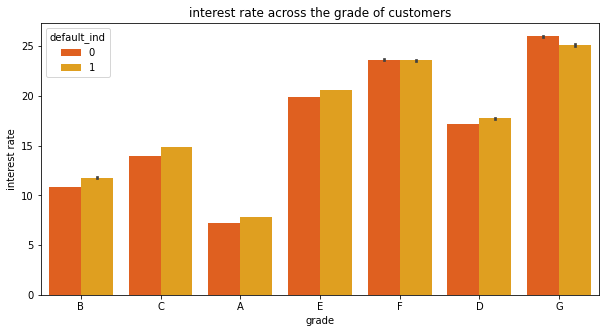

In [25]:
# distribution of interest rate against the grade of the customer
plt.subplots(figsize=(10, 5))
g = sns.barplot(x='grade',y='int_rate',data=data,hue='default_ind',palette='autumn')
g = g.set_ylabel("interest rate")
plt.title('interest rate across the grade of customers')
plt.show()

<font color='royalblue'> this graph clearly states that the people who has defaulted the loan are those whose interest rate is higher. Besides, when we talk about group G, the people who defaulted the loan were actually having lesser interest rate when compared to the people who paid off the loan.

## Issue_d
## Creating a function that will split the issue_d varibale into Month on which the loan was funded

In [27]:
def getMonth(x):
    return x.split('/')[1]


def getYear(x):
    return x.split('/')[2]


data['Month'] = data.issue_d.apply(getMonth)
data['Year'] = data.issue_d.apply(getYear)

<Figure size 1080x288 with 0 Axes>

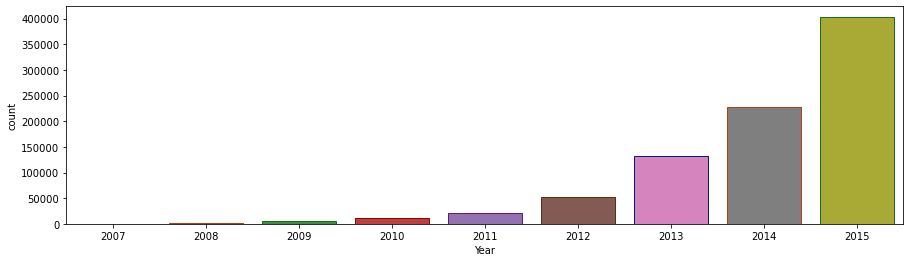

In [28]:
plt.figure(figsize=(15, 4))

sns.countplot(x="Year", data=data, edgecolor=sns.color_palette("dark", 6))

<font color='royalblue'> Increase in funded loan amount with year.

<Figure size 1008x432 with 0 Axes>

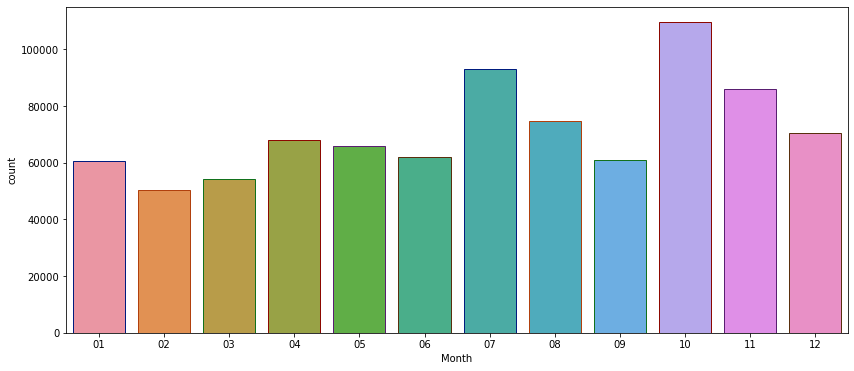

In [29]:
plt.figure(figsize=(14, 6))

sns.countplot(x="Month", data=data, edgecolor=sns.color_palette("dark", 6))

<font color='royalblue'> Funded Loan amount is higher in month of October as comare to rest of the months

# Factorplot for Grade & Term

<Figure size 1800x1440 with 0 Axes>

C:\Users\vin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1800x1440 with 0 Axes>

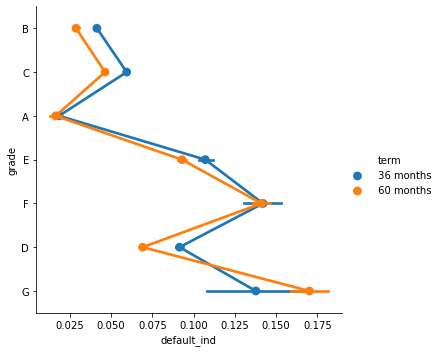

In [30]:
plt.figure(figsize=(25,20))
sns.factorplot(data=data,x='default_ind',y='grade',hue='term')

# Purpose wise loan amount

<Figure size 1008x432 with 0 Axes>

Text(0.5, 0, 'purpose')

Text(0, 0.5, 'Loan Amount')

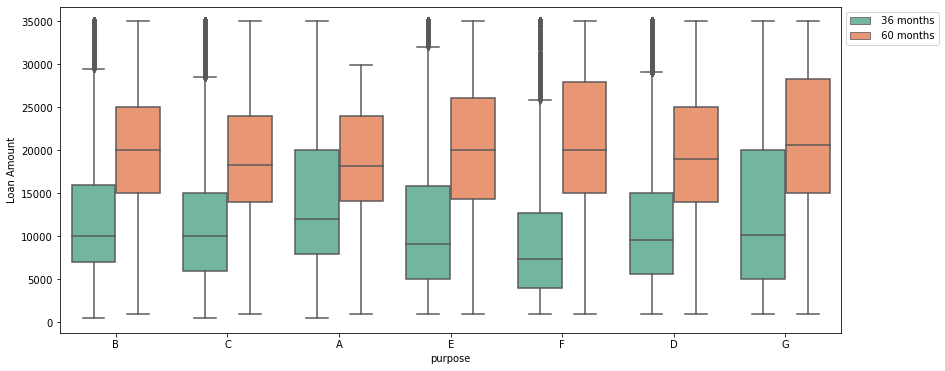

In [31]:
plt.figure(figsize=(14,6))
sns.boxplot(x=data.grade, y=data.loan_amnt, hue=data.term, palette="Set2")

plt.xlabel("purpose")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

<font color='royalblue'> There are more outliers if the loan term is less

# Data Cleansing & Feature extraction

In [32]:
#checking missing values
null = data.isnull().sum()
null

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
                    ...  
total_cu_tl        842681
inq_last_12m       842681
default_ind             0
Month                   0
Year                    0
Length: 75, dtype: int64

Text(0.5, 1.0, 'missing values on the dataset')

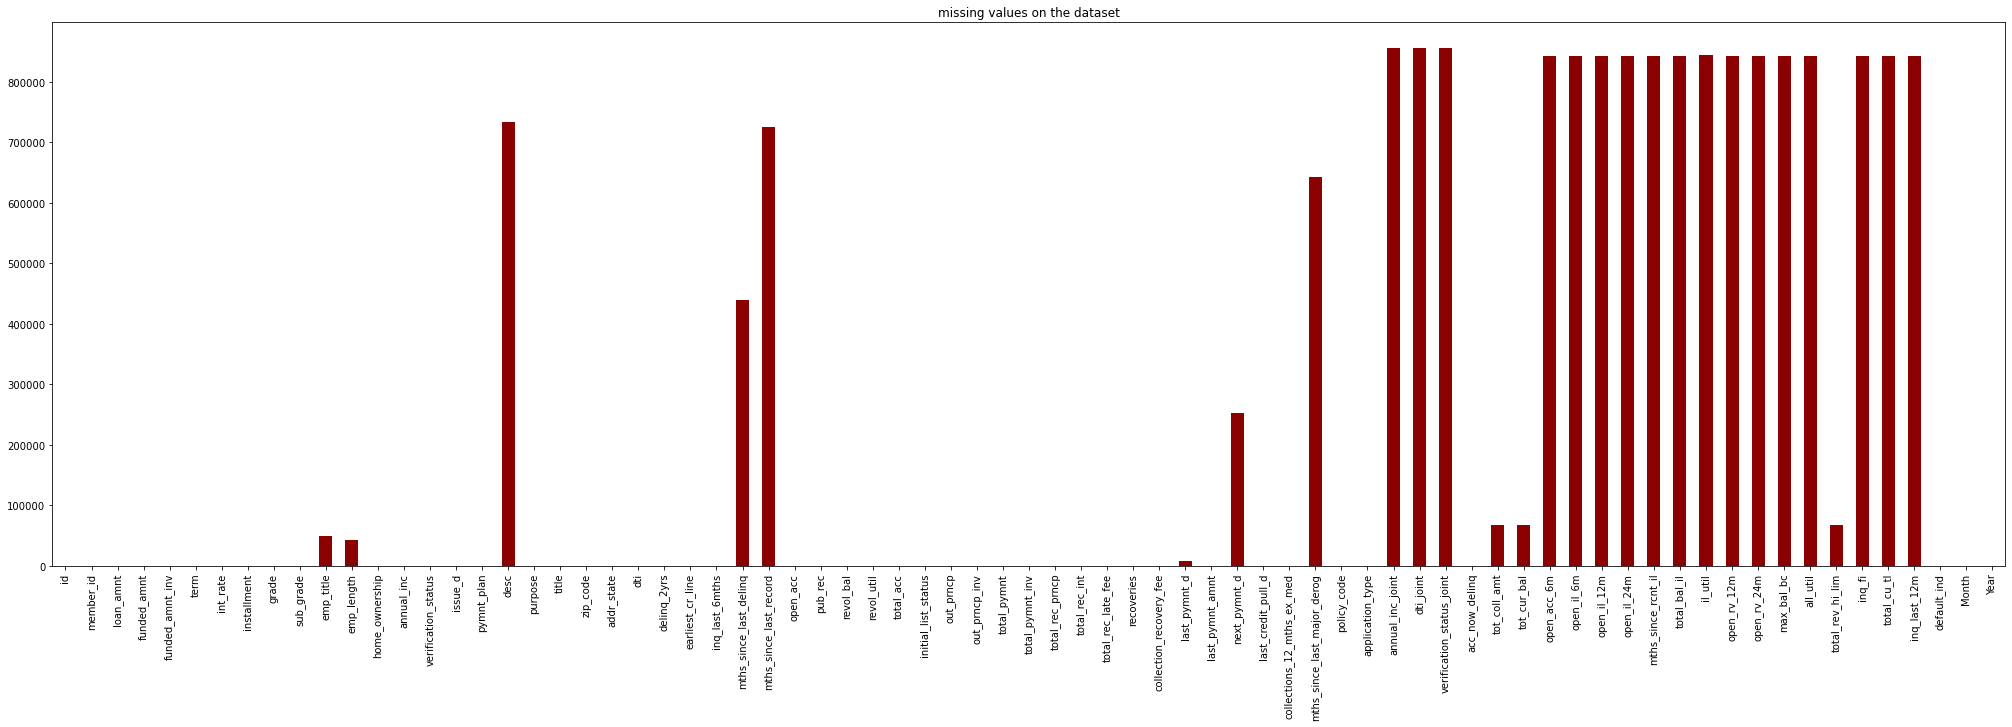

In [33]:
fig = plt.figure(figsize=(35,10))
data.isnull().sum().plot(kind='bar',color='darkred')
plt.title('missing values on the dataset')

<Figure size 1152x432 with 0 Axes>

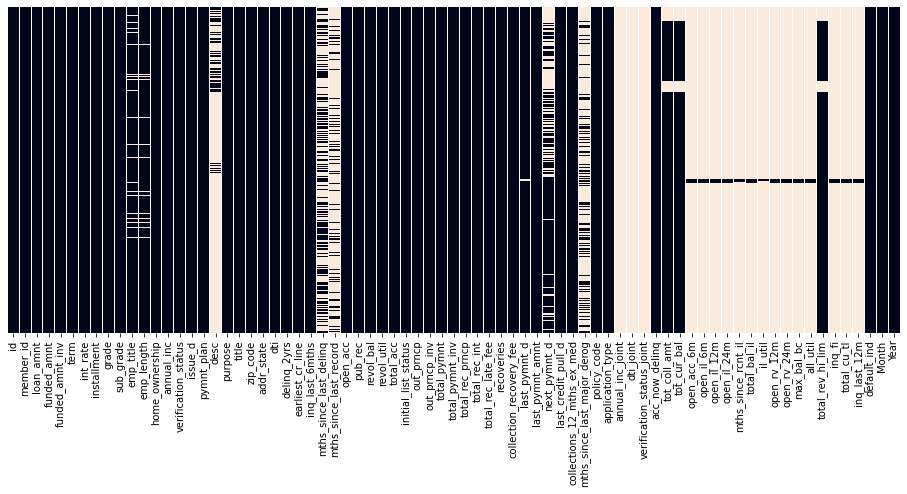

In [34]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [42]:
#deleting columns which have more than 200000(20%) missing values 
null = data.isnull().sum()
for i in range(len(null)):
    if null[i]>200000:
        del data['{}'.format(null.index[i])]

In [43]:
data.shape

(855969, 53)

In [44]:
# Checking categorical features
ctgrl_features = data.select_dtypes(exclude=[np.number])
ctgrl_features.describe()

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,Month,Year
count,855969,855969,855969,855969,806526,812908,855969,855969,855969,855969,855969,855936,855969,855969,855969,855969,847107,855919,855969,855969,855969
unique,855969,2,7,35,290910,11,6,3,103,2,14,60957,931,51,697,2,97,102,2,12,9
top,11386408,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,01/10/2015,n,debt_consolidation,Debt consolidation,945xx,CA,Aug-01,f,Jan-16,Jan-16,INDIVIDUAL,10,2015
freq,1,600221,247998,54958,12965,282090,429106,318178,48212,855964,505392,398089,9466,125172,6433,442555,467510,701687,855527,109565,403697


In [45]:
# Checking numerical features
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
policy_code 

In [46]:
#checking variance for numeric varibales
var = numeric_features.var()
var

member_id                     5.757205e+14
loan_amnt                     7.098635e+07
funded_amnt                   7.088750e+07
funded_amnt_inv               7.099420e+07
int_rate                      1.908261e+01
installment                   5.940279e+04
annual_inc                    4.129922e+09
dti                           3.035829e+02
delinq_2yrs                   7.347737e-01
inq_last_6mths                9.293598e-01
open_acc                      2.817586e+01
pub_rec                       3.382416e-01
revol_bal                     4.938947e+08
revol_util                    5.669916e+02
total_acc                     1.396850e+02
out_prncp                     7.160454e+07
out_prncp_inv                 7.154616e+07
total_pymnt                   6.255835e+07
total_pymnt_inv               6.217569e+07
total_rec_prncp               4.457446e+07
total_rec_int                 4.333446e+06
total_rec_late_fee            1.302776e+01
recoveries                    1.706814e+05
collection_

# Outlier Detection & treatment

In [47]:
import scipy.stats as stats

In [48]:
def diagnostic_plots(df, variable):
    

    # define figure size
    plt.figure(figsize=(16, 4))

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

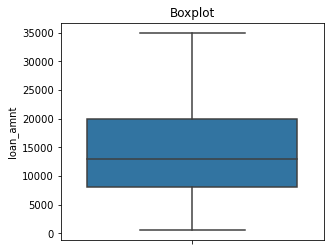

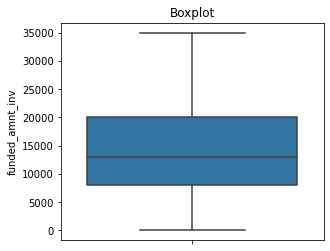

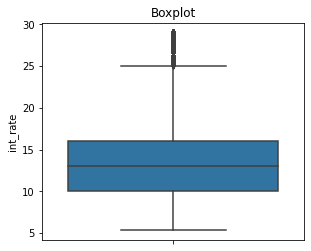

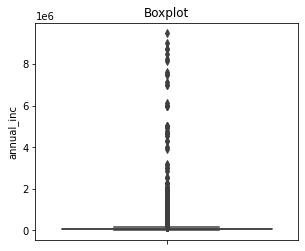

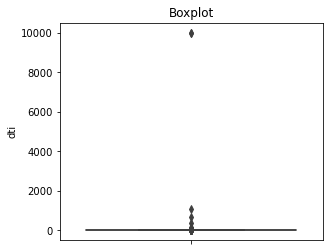

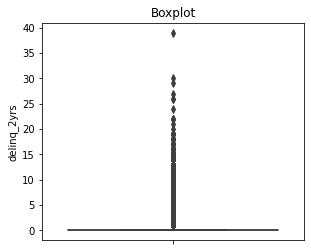

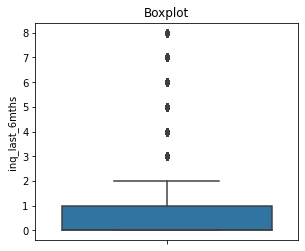

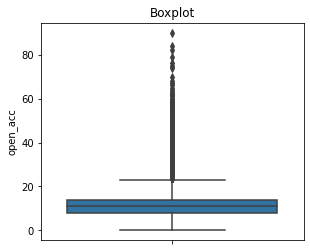

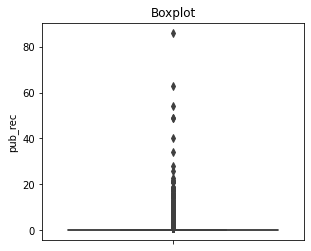

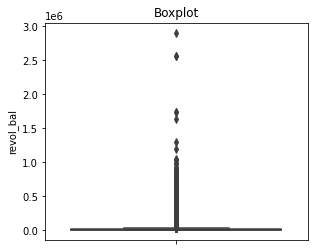

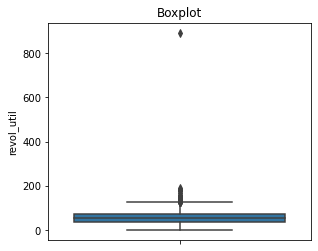

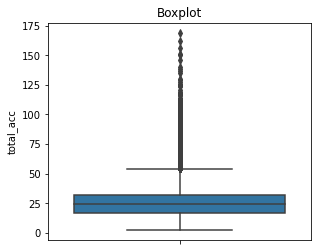

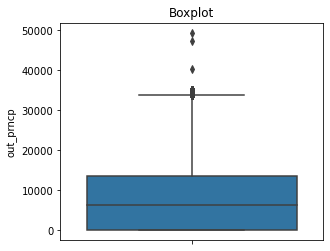

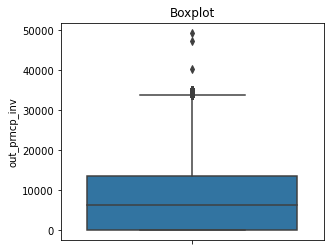

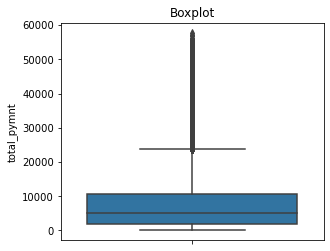

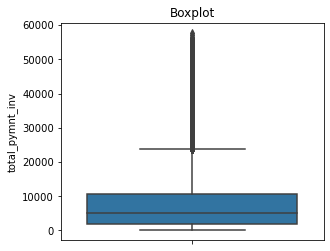

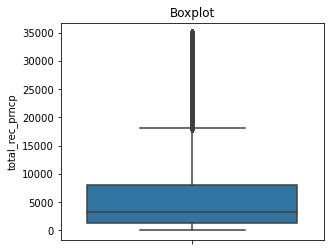

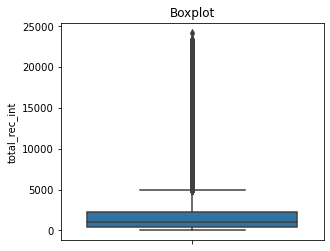

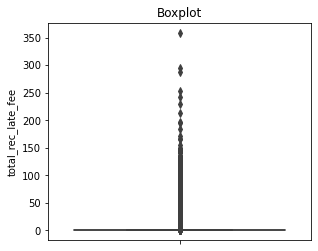

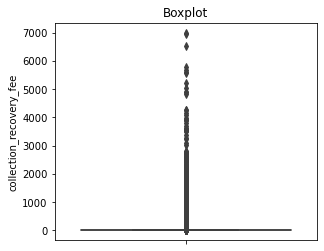

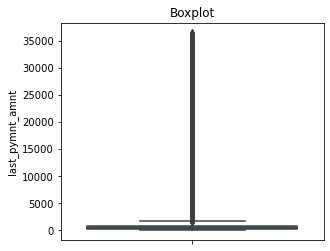

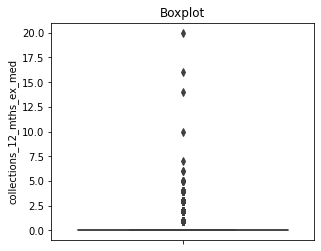

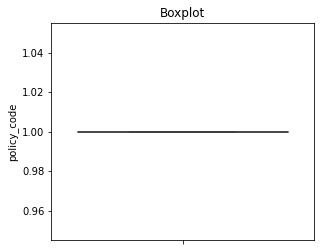

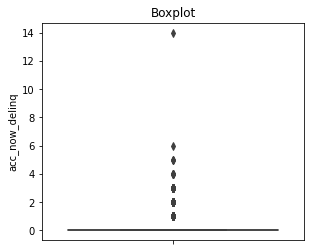

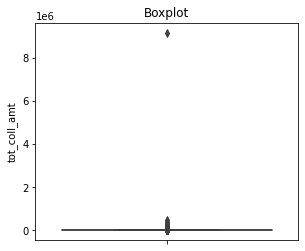

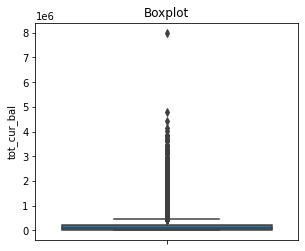

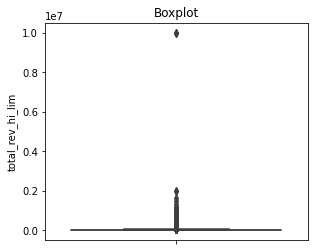

In [49]:
diagnostic_plots(data, 'loan_amnt')
diagnostic_plots(data, 'funded_amnt_inv')
diagnostic_plots(data, 'int_rate')
diagnostic_plots(data, 'annual_inc')
diagnostic_plots(data, 'dti')
diagnostic_plots(data, 'delinq_2yrs')
diagnostic_plots(data, 'inq_last_6mths')
diagnostic_plots(data, 'open_acc')
diagnostic_plots(data, 'pub_rec')
diagnostic_plots(data, 'revol_bal')
diagnostic_plots(data, 'revol_util')
diagnostic_plots(data, 'total_acc')
diagnostic_plots(data, 'out_prncp')
diagnostic_plots(data, 'out_prncp_inv')
diagnostic_plots(data, 'total_pymnt')
diagnostic_plots(data, 'total_pymnt_inv')
diagnostic_plots(data, 'total_rec_prncp')
diagnostic_plots(data, 'total_rec_int')
diagnostic_plots(data, 'total_rec_late_fee')
diagnostic_plots(data, 'collection_recovery_fee')
diagnostic_plots(data, 'last_pymnt_amnt')
diagnostic_plots(data, 'collections_12_mths_ex_med')
diagnostic_plots(data, 'policy_code')
diagnostic_plots(data, 'acc_now_delinq')
diagnostic_plots(data, 'tot_coll_amt')
diagnostic_plots(data, 'tot_cur_bal')
diagnostic_plots(data, 'total_rev_hi_lim')

In [50]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [51]:
loan_amnt_upper_limit, loan_amnt_lower_limit = find_boundaries(data, 'loan_amnt', 1.5)
loan_amnt_upper_limit, loan_amnt_lower_limit

funded_amnt_inv_upper_limit, funded_amnt_inv_lower_limit = find_boundaries(data, 'funded_amnt_inv', 1.5)
funded_amnt_inv_upper_limit, funded_amnt_inv_lower_limit

int_rate_upper_limit, int_rate_lower_limit = find_boundaries(data, 'int_rate', 1.5)
int_rate_upper_limit, int_rate_lower_limit

annual_inc_upper_limit, annual_inc_lower_limit = find_boundaries(data, 'annual_inc', 1.5)
annual_inc_upper_limit, annual_inc_lower_limit

dti_upper_limit, dti_lower_limit = find_boundaries(data, 'dti', 1.5)
annual_inc_upper_limit, annual_inc_lower_limit

delinq_2yrs_upper_limit, delinq_2yrs_lower_limit = find_boundaries(data, 'delinq_2yrs', 1.5)
delinq_2yrs_upper_limit, delinq_2yrs_lower_limit

inq_last_6mths_upper_limit, inq_last_6mths_lower_limit = find_boundaries(data, 'inq_last_6mths', 1.5)
inq_last_6mths_upper_limit, inq_last_6mths_lower_limit

open_acc_upper_limit, open_acc_lower_limit = find_boundaries(data, 'open_acc', 1.5)
open_acc_upper_limit, open_acc_lower_limit

pub_rec_upper_limit, pub_rec_lower_limit = find_boundaries(data, 'pub_rec', 1.5)
pub_rec_upper_limit, pub_rec_lower_limit

revol_bal_upper_limit, revol_bal_lower_limit = find_boundaries(data, 'revol_bal', 1.5)
revol_bal_upper_limit, revol_bal_lower_limit

revol_util_upper_limit, revol_util_lower_limit = find_boundaries(data, 'revol_util', 1.5)
revol_util_upper_limit, revol_util_lower_limit

total_acc_upper_limit, total_acc_lower_limit = find_boundaries(data, 'total_acc', 1.5)
total_acc_upper_limit, total_acc_lower_limit

out_prncp_upper_limit, out_prncp_lower_limit = find_boundaries(data, 'out_prncp', 1.5)
out_prncp_upper_limit, out_prncp_lower_limit

out_prncp_inv_upper_limit, out_prncp_inv_lower_limit = find_boundaries(data, 'out_prncp_inv', 1.5)
out_prncp_inv_upper_limit, out_prncp_inv_lower_limit

total_pymnt_upper_limit, total_pymnt_lower_limit = find_boundaries(data, 'total_pymnt', 1.5)
total_pymnt_upper_limit, total_pymnt_lower_limit

total_pymnt_inv_upper_limit, total_pymnt_inv_lower_limit = find_boundaries(data, 'total_pymnt_inv', 1.5)
total_pymnt_inv_upper_limit, total_pymnt_inv_lower_limit

total_rec_prncp_upper_limit, total_rec_prncp_lower_limit = find_boundaries(data, 'total_rec_prncp', 1.5)
total_rec_prncp_upper_limit, total_rec_prncp_lower_limit

total_rec_int_upper_limit, total_rec_int_lower_limit = find_boundaries(data, 'total_rec_int', 1.5)
total_rec_int_upper_limit, total_rec_int_lower_limit 

total_rec_late_fee_upper_limit, total_rec_late_fee_lower_limit = find_boundaries(data, 'total_rec_late_fee', 1.5)
total_rec_late_fee_upper_limit, total_rec_late_fee_lower_limit

collection_recovery_fee_upper_limit, collection_recovery_fee_lower_limit = find_boundaries(data, 'collection_recovery_fee', 1.5)
collection_recovery_fee_upper_limit, collection_recovery_fee_lower_limit 

last_pymnt_amnt_upper_limit, last_pymnt_amnt_lower_limit = find_boundaries(data, 'last_pymnt_amnt', 1.5)
last_pymnt_amnt_upper_limit, last_pymnt_amnt_lower_limit

collections_12_mths_ex_med_upper_limit, collections_12_mths_ex_med_lower_limit = find_boundaries(data, 'collections_12_mths_ex_med', 1.5)
collections_12_mths_ex_med_upper_limit, collections_12_mths_ex_med_lower_limit 

policy_code_upper_limit, policy_code_lower_limit = find_boundaries(data, 'policy_code', 1.5)
policy_code_upper_limit, policy_code_lower_limit

acc_now_delinq_upper_limit, acc_now_delinq_lower_limit = find_boundaries(data, 'acc_now_delinq', 1.5)
acc_now_delinq_upper_limit, acc_now_delinq_lower_limit

tot_coll_amt_upper_limit, tot_coll_amt_lower_limit = find_boundaries(data, 'tot_coll_amt', 1.5)
tot_coll_amt_upper_limit, tot_coll_amt_lower_limit

tot_cur_bal_upper_limit, tot_cur_bal_lower_limit = find_boundaries(data, 'tot_cur_bal', 1.5)
tot_cur_bal_upper_limit, tot_cur_bal_lower_limit

total_rev_hi_lim_upper_limit, total_rev_hi_lim_lower_limit = find_boundaries(data, 'total_rev_hi_lim', 1.5)
total_rev_hi_lim_upper_limit, total_rev_hi_lim_lower_limit 


(38000.0, -10000.0)

(38000.0, -10000.0)

(24.990000000000002, 0.9900000000000002)

(157500.0, -22500.0)

(157500.0, -22500.0)

(0.0, 0.0)

(2.5, -1.5)

(23.0, -1.0)

(0.0, 0.0)

(42439.0, -15113.0)

(127.35, -16.249999999999993)

(54.5, -5.5)

(33822.0, -20293.199999999997)

(33806.275, -20283.765)

(23907.474125, -11192.980474999998)

(23803.144999999997, -11145.695)

(18140.075, -8900.125)

(4908.045, -2222.795)

(0.0, 0.0)

(0.0, 0.0)

(1694.77, -560.19)

(0.0, 0.0)

(1.0, 1.0)

(0.0, 0.0)

(0.0, 0.0)

(476953.125, -238379.875)

(78750.0, -24850.0)

In [52]:
# Now let's replace the outliers by the maximum and minimum limit

data['loan_amnt']= np.where(data['loan_amnt'] > loan_amnt_upper_limit, loan_amnt_upper_limit,
                       np.where(data['loan_amnt'] < loan_amnt_lower_limit, loan_amnt_lower_limit, data['loan_amnt']))

data['funded_amnt_inv']= np.where(data['funded_amnt_inv'] > funded_amnt_inv_upper_limit, funded_amnt_inv_upper_limit,
                       np.where(data['funded_amnt_inv'] < funded_amnt_inv_lower_limit, funded_amnt_inv_lower_limit, data['funded_amnt_inv']))

data['int_rate']= np.where(data['int_rate'] > int_rate_upper_limit, int_rate_upper_limit,
                       np.where(data['int_rate'] < int_rate_lower_limit, int_rate_lower_limit, data['int_rate']))

data['annual_inc']= np.where(data['annual_inc'] > annual_inc_upper_limit, annual_inc_upper_limit,
                       np.where(data['annual_inc'] < annual_inc_lower_limit, annual_inc_lower_limit, data['annual_inc']))

data['dti']= np.where(data['dti'] > dti_upper_limit, dti_upper_limit,
                       np.where(data['dti'] < dti_lower_limit, dti_lower_limit, data['dti']))

data['delinq_2yrs']= np.where(data['delinq_2yrs'] > delinq_2yrs_upper_limit, delinq_2yrs_upper_limit,
                       np.where(data['delinq_2yrs'] < delinq_2yrs_lower_limit, delinq_2yrs_lower_limit, data['delinq_2yrs']))

data['inq_last_6mths']= np.where(data['inq_last_6mths'] > inq_last_6mths_upper_limit, inq_last_6mths_upper_limit,
                       np.where(data['inq_last_6mths'] < inq_last_6mths_lower_limit, inq_last_6mths_lower_limit, data['inq_last_6mths']))

data['open_acc']= np.where(data['open_acc'] > open_acc_upper_limit, open_acc_upper_limit,
                       np.where(data['open_acc'] < open_acc_lower_limit, open_acc_lower_limit, data['open_acc']))

data['pub_rec']= np.where(data['pub_rec'] > pub_rec_upper_limit, pub_rec_upper_limit,
                       np.where(data['pub_rec'] < pub_rec_lower_limit, pub_rec_lower_limit, data['pub_rec']))

data['revol_bal']= np.where(data['revol_bal'] > revol_bal_upper_limit, revol_bal_upper_limit,
                       np.where(data['revol_bal'] < revol_bal_lower_limit, revol_bal_lower_limit, data['revol_bal']))

data['revol_util']= np.where(data['revol_util'] > revol_util_upper_limit, revol_util_upper_limit,
                       np.where(data['revol_util'] < revol_util_lower_limit, revol_util_lower_limit, data['revol_util']))

data['total_acc']= np.where(data['total_acc'] > total_acc_upper_limit, total_acc_upper_limit,
                       np.where(data['total_acc'] < total_acc_lower_limit, total_acc_lower_limit, data['total_acc']))

data['out_prncp']= np.where(data['out_prncp'] > out_prncp_upper_limit, out_prncp_upper_limit,
                       np.where(data['out_prncp'] < out_prncp_lower_limit, out_prncp_lower_limit, data['out_prncp']))

data['out_prncp_inv']= np.where(data['out_prncp_inv'] > out_prncp_inv_upper_limit, out_prncp_inv_upper_limit,
                       np.where(data['out_prncp_inv'] < out_prncp_inv_lower_limit, out_prncp_inv_lower_limit, data['out_prncp_inv']))

data['total_pymnt']= np.where(data['total_pymnt'] > total_pymnt_upper_limit, total_pymnt_upper_limit,
                       np.where(data['total_pymnt'] < total_pymnt_lower_limit, total_pymnt_lower_limit, data['total_pymnt']))

data['total_pymnt_inv']= np.where(data['total_pymnt_inv'] > total_pymnt_inv_upper_limit, total_pymnt_inv_upper_limit,
                       np.where(data['total_pymnt_inv'] < total_pymnt_inv_lower_limit, total_pymnt_inv_lower_limit, data['total_pymnt_inv']))

data['total_rec_prncp']= np.where(data['total_rec_prncp'] > total_rec_prncp_upper_limit, total_rec_prncp_upper_limit,
                       np.where(data['total_rec_prncp'] < total_rec_prncp_lower_limit, total_rec_prncp_lower_limit, data['total_rec_prncp']))

data['total_rec_int']= np.where(data['total_rec_int'] > total_rec_int_upper_limit, total_rec_int_upper_limit,
                       np.where(data['total_rec_int'] < total_rec_int_lower_limit, total_rec_int_lower_limit, data['total_rec_int']))

data['total_rec_late_fee']= np.where(data['total_rec_late_fee'] > total_rec_late_fee_upper_limit, total_rec_late_fee_upper_limit,
                       np.where(data['total_rec_late_fee'] < total_rec_late_fee_lower_limit, total_rec_late_fee_lower_limit, data['total_rec_late_fee']))

data['collection_recovery_fee']= np.where(data['collection_recovery_fee'] > collection_recovery_fee_upper_limit, collection_recovery_fee_upper_limit,
                       np.where(data['collection_recovery_fee'] < collection_recovery_fee_lower_limit, collection_recovery_fee_lower_limit, data['collection_recovery_fee']))


data['last_pymnt_amnt']= np.where(data['last_pymnt_amnt'] > last_pymnt_amnt_upper_limit, last_pymnt_amnt_upper_limit,
                       np.where(data['last_pymnt_amnt'] < last_pymnt_amnt_lower_limit, last_pymnt_amnt_lower_limit, data['last_pymnt_amnt']))


data['collections_12_mths_ex_med']= np.where(data['collections_12_mths_ex_med'] > collections_12_mths_ex_med_upper_limit, collections_12_mths_ex_med_upper_limit,
                       np.where(data['collections_12_mths_ex_med'] < collections_12_mths_ex_med_lower_limit, collections_12_mths_ex_med_lower_limit, data['collections_12_mths_ex_med']))


data['policy_code']= np.where(data['policy_code'] > policy_code_upper_limit, policy_code_upper_limit,
                       np.where(data['policy_code'] < policy_code_lower_limit, policy_code_lower_limit, data['policy_code']))


data['acc_now_delinq']= np.where(data['acc_now_delinq'] > acc_now_delinq_upper_limit, acc_now_delinq_upper_limit,
                       np.where(data['acc_now_delinq'] < acc_now_delinq_lower_limit, acc_now_delinq_lower_limit, data['acc_now_delinq']))


data['tot_coll_amt']= np.where(data['tot_coll_amt'] > tot_coll_amt_upper_limit, tot_coll_amt_upper_limit,
                       np.where(data['tot_coll_amt'] < tot_coll_amt_lower_limit, tot_coll_amt_lower_limit, data['tot_coll_amt']))


data['tot_cur_bal']= np.where(data['tot_cur_bal'] > tot_cur_bal_upper_limit, tot_cur_bal_upper_limit,
                       np.where(data['tot_cur_bal'] < tot_cur_bal_lower_limit, tot_cur_bal_lower_limit, data['tot_cur_bal']))


data['total_rev_hi_lim']= np.where(data['total_rev_hi_lim'] > total_rev_hi_lim_upper_limit, total_rev_hi_lim_upper_limit,
                       np.where(data['total_rev_hi_lim'] < total_rev_hi_lim_lower_limit, total_rev_hi_lim_lower_limit, data['total_rev_hi_lim']))


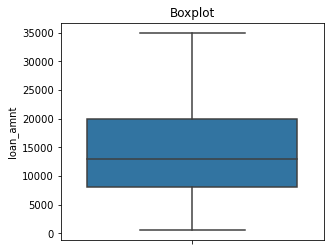

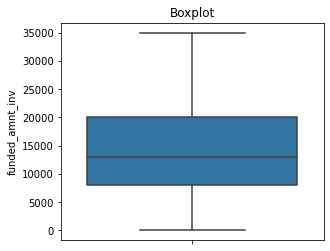

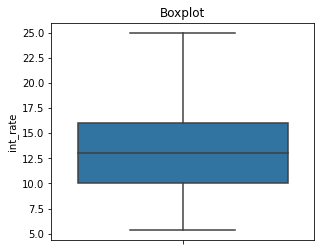

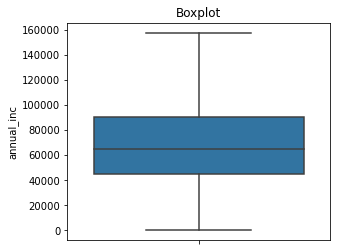

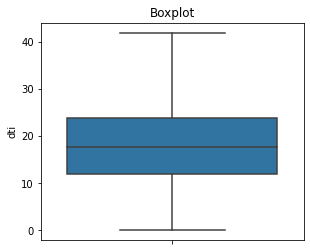

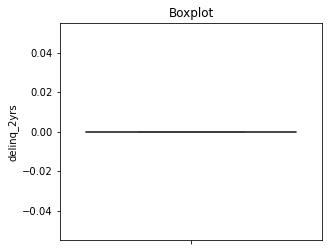

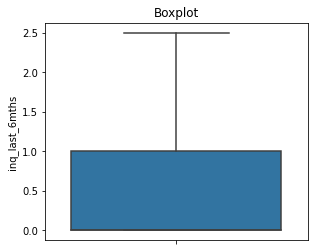

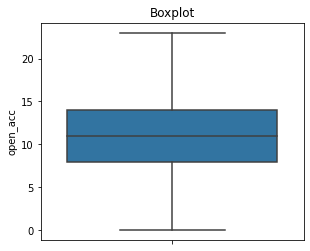

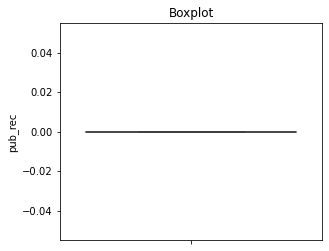

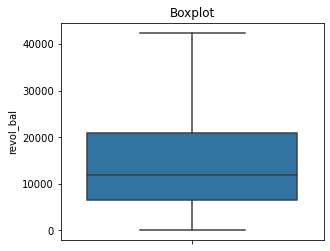

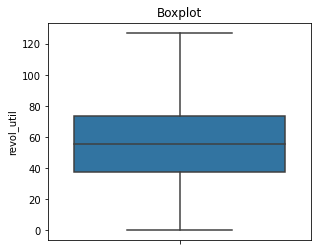

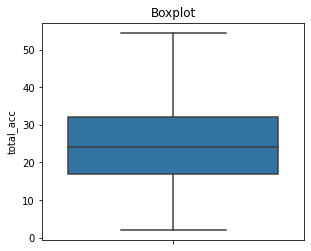

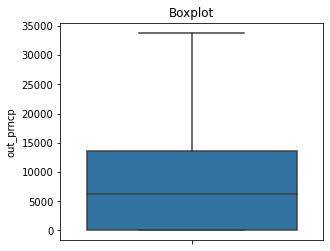

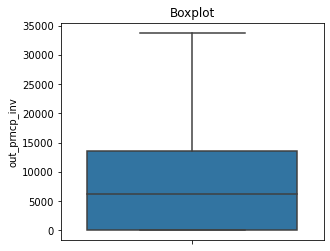

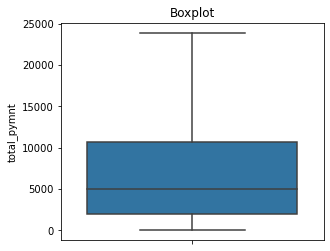

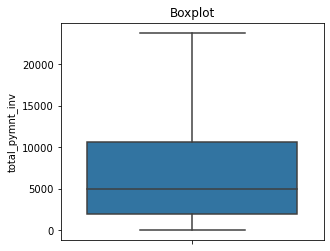

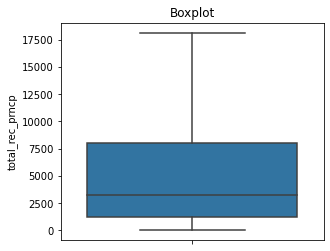

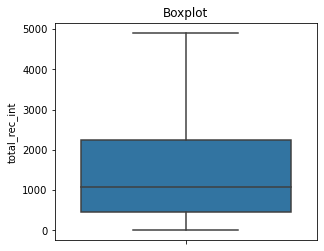

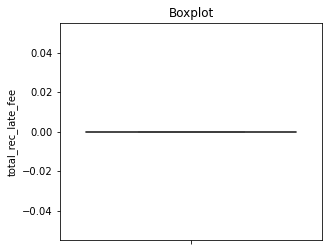

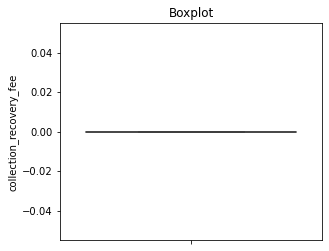

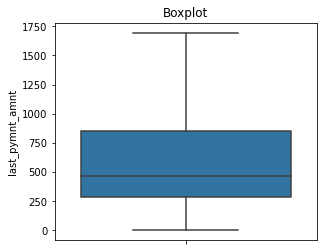

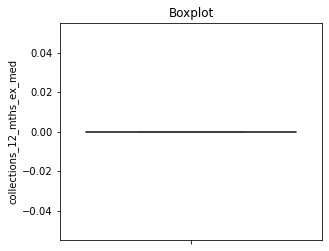

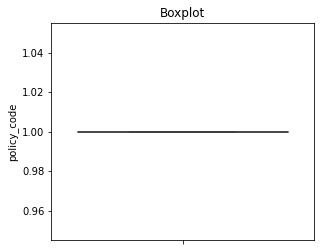

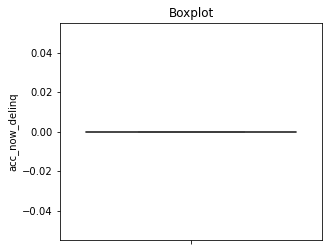

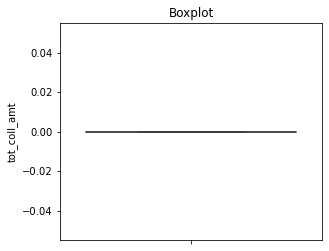

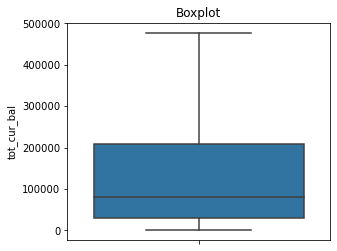

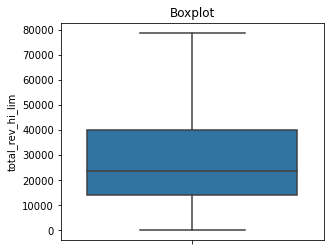

In [53]:
diagnostic_plots(data, 'loan_amnt')
diagnostic_plots(data, 'funded_amnt_inv')
diagnostic_plots(data, 'int_rate')
diagnostic_plots(data, 'annual_inc')
diagnostic_plots(data, 'dti')
diagnostic_plots(data, 'delinq_2yrs')
diagnostic_plots(data, 'inq_last_6mths')
diagnostic_plots(data, 'open_acc')
diagnostic_plots(data, 'pub_rec')
diagnostic_plots(data, 'revol_bal')
diagnostic_plots(data, 'revol_util')
diagnostic_plots(data, 'total_acc')
diagnostic_plots(data, 'out_prncp')
diagnostic_plots(data, 'out_prncp_inv')
diagnostic_plots(data, 'total_pymnt')
diagnostic_plots(data, 'total_pymnt_inv')
diagnostic_plots(data, 'total_rec_prncp')
diagnostic_plots(data, 'total_rec_int')
diagnostic_plots(data, 'total_rec_late_fee')
diagnostic_plots(data, 'collection_recovery_fee')
diagnostic_plots(data, 'last_pymnt_amnt')
diagnostic_plots(data, 'collections_12_mths_ex_med')
diagnostic_plots(data, 'policy_code')
diagnostic_plots(data, 'acc_now_delinq')
diagnostic_plots(data, 'tot_coll_amt')
diagnostic_plots(data, 'tot_cur_bal')
diagnostic_plots(data, 'total_rev_hi_lim')

In [54]:
#checking corelation between numeric features
corr = numeric_features.corr()
print(corr['default_ind'].sort_values(ascending=False))

default_ind                   1.000000
recoveries                    0.475738
collection_recovery_fee       0.330764
int_rate                      0.155037
total_rec_late_fee            0.140760
inq_last_6mths                0.074407
total_rec_int                 0.046050
revol_util                    0.044497
installment                   0.004753
dti                           0.004429
tot_coll_amt                 -0.001921
acc_now_delinq               -0.003116
loan_amnt                    -0.004907
funded_amnt                  -0.005797
funded_amnt_inv              -0.008209
delinq_2yrs                  -0.009186
collections_12_mths_ex_med   -0.010650
pub_rec                      -0.019607
revol_bal                    -0.020696
total_acc                    -0.021087
open_acc                     -0.021698
total_rev_hi_lim             -0.033620
tot_cur_bal                  -0.036335
annual_inc                   -0.037066
total_pymnt                  -0.039220
total_pymnt_inv          

# Correlation Matrix

<Figure size 1440x1080 with 0 Axes>

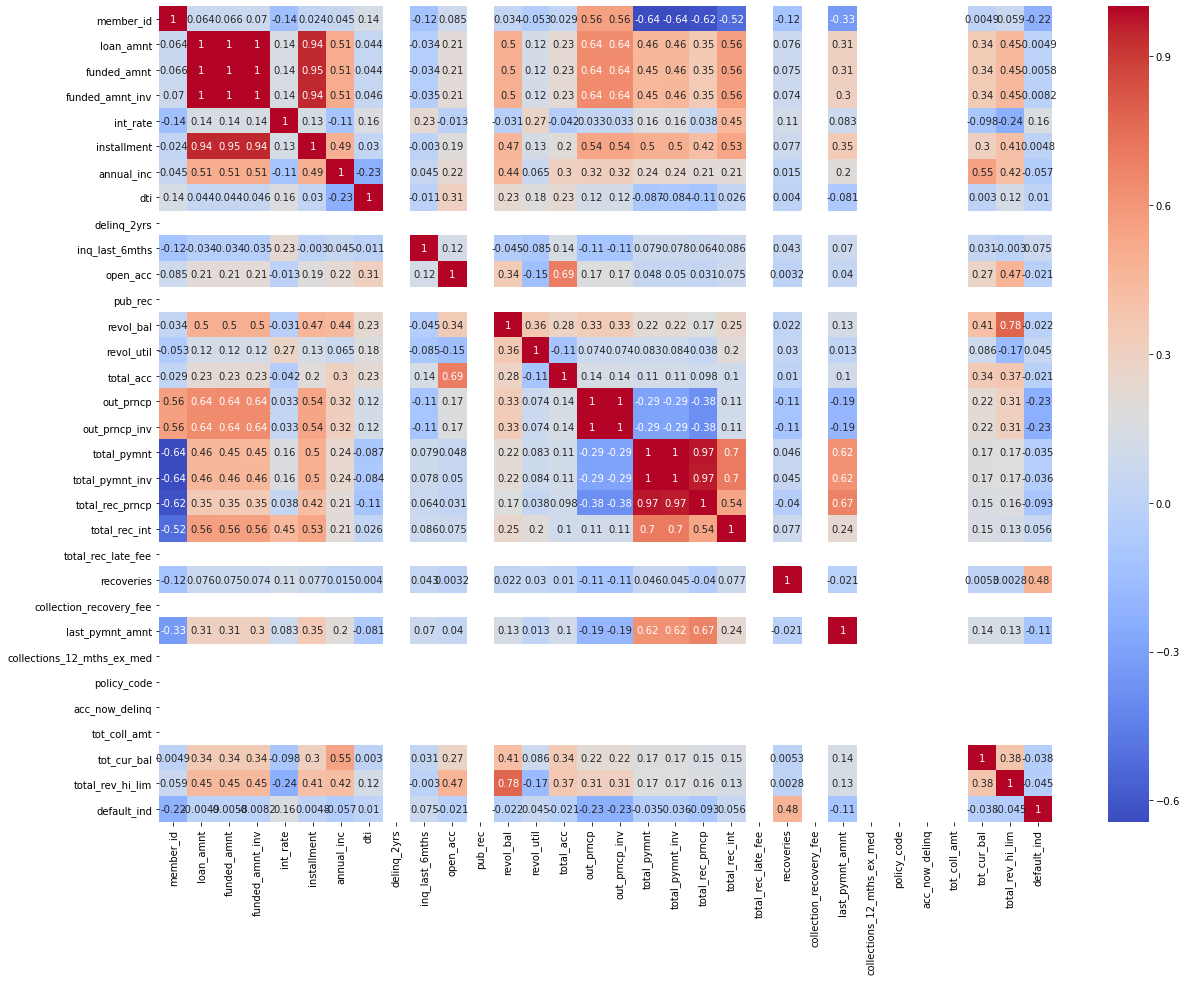

In [55]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [56]:
# dropping irrelevant column
new_data = data.drop(['id','member_id','emp_title','title','zip_code','earliest_cr_line',
                      'last_pymnt_d','last_credit_pull_d'], axis=1)
new_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
0,5000.0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,01/12/2011,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.0,171.62,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,12,2011
1,2500.0,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,01/12/2011,n,car,GA,1.00,0.0,2.5,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.0,117.08,0.0,119.66,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,12,2011
2,2400.0,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,01/12/2011,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.0,649.91,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,12,2011
3,10000.0,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,01/12/2011,n,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,0.0,0.00,0.0,357.48,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,12,2011
4,3000.0,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,01/12/2011,n,other,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.0,0.00,0.0,67.79,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000,10000.0,36 months,11.99,332.10,B,B5,8 years,RENT,31000.0,Verified,01/01/2015,n,debt_consolidation,CA,28.69,0.0,0.0,9.0,0.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.0,0.00,0.0,332.10,0.0,1.0,INDIVIDUAL,0.0,0.0,25274.0,17100.0,0,01,2015
855965,24000.0,24000,24000.0,36 months,11.99,797.03,B,B5,10+ years,MORTGAGE,79000.0,Verified,01/01/2015,n,home_improvement,NJ,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.0,0.00,0.0,797.03,0.0,1.0,INDIVIDUAL,0.0,0.0,140285.0,10200.0,0,01,2015
855966,13000.0,13000,13000.0,60 months,15.99,316.07,D,D2,5 years,RENT,35000.0,Verified,01/01/2015,n,debt_consolidation,TN,30.90,0.0,0.0,9.0,0.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.0,0.00,0.0,316.07,0.0,1.0,INDIVIDUAL,0.0,0.0,34178.0,18000.0,0,01,2015
855967,12000.0,12000,12000.0,60 months,19.99,317.86,E,E3,1 year,RENT,64400.0,Source Verified,01/01/2015,n,debt_consolidation,MA,27.19,0.0,2.0,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.0,0.00,0.0,317.86,0.0,1.0,INDIVIDUAL,0.0,0.0,58418.0,27000.0,0,01,2015


In [57]:
new_data.shape

(855969, 45)

In [58]:
#again checkin missing values in new data
new_data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

In [59]:
#imputation of missing values with mean & mode respectively
new_data['emp_length'] = new_data['emp_length'].fillna(new_data['emp_length'].mode()[0])
new_data['revol_util'] = new_data['revol_util'].fillna(new_data['revol_util'].mean())
new_data['collections_12_mths_ex_med'] = new_data['collections_12_mths_ex_med'].fillna(new_data['collections_12_mths_ex_med'].mean())
new_data['tot_coll_amt'] = new_data['tot_coll_amt'].fillna(new_data['tot_coll_amt'].mean())
new_data['tot_cur_bal'] = new_data['tot_cur_bal'].fillna(new_data['tot_cur_bal'].mean())
new_data['total_rev_hi_lim'] = new_data['total_rev_hi_lim'].fillna(new_data['total_rev_hi_lim'].mean())

In [60]:
# Checking missing values again after cleansing & imputation
new_data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [61]:
#While looking at categorial features, we obeserved that columns sub_grade(35 catagories) & addr_state(51 catagories) has more categories; 
#if we apply one hot encodding here, then then it will increase in number of columns by 84;
#so we will apply lable encodding here only for these 2 columns & one hot encoding for rest of the columns
new_data['sub_grade'].value_counts()
new_data['addr_state'].value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

In [62]:
# we will keep these 2 columns seperate for label encoding purpose
new_data2 = new_data[['sub_grade','addr_state']]
new_data2

,sub_grade,addr_state
0,B2,AZ
1,C4,GA
2,C5,IL
3,C1,CA
4,B5,OR
...,...,...
855964,B5,CA
855965,B5,NJ
855966,D2,TN
855967,E3,MA


In [63]:
# applying label encodding for above 2 columns 
from sklearn.preprocessing import LabelEncoder

In [64]:
label = LabelEncoder()
data = [new_data2]
for dataset in data:
    dataset['sub_grade_new'] = label.fit_transform(dataset['sub_grade'])
    dataset['addr_state_new'] = label.fit_transform(dataset['addr_state'])

C:\Users\vin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\vin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [65]:
# now after applying label encodding, we concatenate new encodded data & old one also deleting no longer needed columns

In [66]:
new_data3 = pd.concat([new_data,new_data2],axis=1)
new_data3
new_data4 = new_data3.drop(['sub_grade','addr_state'],axis=1)
new_data4

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year,sub_grade,addr_state,sub_grade_new,addr_state_new
0,5000.0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,01/12/2011,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.0,171.62,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,B2,AZ,6,3
1,2500.0,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,01/12/2011,n,car,GA,1.00,0.0,2.5,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.0,117.08,0.0,119.66,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,1,12,2011,C4,GA,13,10
2,2400.0,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,01/12/2011,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.0,649.91,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,C5,IL,14,14
3,10000.0,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,01/12/2011,n,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,0.0,0.00,0.0,357.48,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,C1,CA,10,4
4,3000.0,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,01/12/2011,n,other,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.0,0.00,0.0,67.79,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,B5,OR,9,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000,10000.0,36 months,11.99,332.10,B,B5,8 years,RENT,31000.0,Verified,01/01/2015,n,debt_consolidation,CA,28.69,0.0,0.0,9.0,0.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.0,0.00,0.0,332.10,0.0,1.0,INDIVIDUAL,0.0,0.0,25274.000000,17100.000000,0,01,2015,B5,CA,9,4
855965,24000.0,24000,24000.0,36 months,11.99,797.03,B,B5,10+ years,MORTGAGE,79000.0,Verified,01/01/2015,n,home_improvement,NJ,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.0,0.00,0.0,797.03,0.0,1.0,INDIVIDUAL,0.0,0.0,140285.000000,10200.000000,0,01,2015,B5,NJ,9,31
855966,13000.0,13000,13000.0,60 months,15.99,316.07,D,D2,5 years,RENT,35000.0,Verified,01/01/2015,n,debt_consolidation,TN,30.90,0.0,0.0,9.0,0.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.0,0.00,0.0,316.07,0.0,1.0,INDIVIDUAL,0.0,0.0,34178.000000,18000.000000,0,01,2015,D2,TN,16,42
855967,12000.0,12000,12000.0,60 months,19.99,317.86,E,E3,1 year,RENT,64400.0,Source Verified,01/01/2015,n,debt_consolidation,MA,27.19,0.0,2.0,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.0,0.00,0.0,317.86,0.0,1.0,INDIVIDUAL,0.0,0.0,58418.000000,27000.000000,0,01,2015,E3,MA,22,19


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year,sub_grade_new,addr_state_new
0,5000.0,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,01/12/2011,n,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.0,171.62,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,6,3
1,2500.0,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,01/12/2011,n,car,1.00,0.0,2.5,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.0,117.08,0.0,119.66,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,1,12,2011,13,10
2,2400.0,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,01/12/2011,n,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.0,649.91,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,14,14
3,10000.0,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,01/12/2011,n,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,0.0,0.00,0.0,357.48,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,10,4
4,3000.0,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,01/12/2011,n,other,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.0,0.00,0.0,67.79,0.0,1.0,INDIVIDUAL,0.0,0.0,133977.207359,29537.989783,0,12,2011,9,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000,10000.0,36 months,11.99,332.10,B,8 years,RENT,31000.0,Verified,01/01/2015,n,debt_consolidation,28.69,0.0,0.0,9.0,0.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.0,0.00,0.0,332.10,0.0,1.0,INDIVIDUAL,0.0,0.0,25274.000000,17100.000000,0,01,2015,9,4
855965,24000.0,24000,24000.0,36 months,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,01/01/2015,n,home_improvement,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.0,0.00,0.0,797.03,0.0,1.0,INDIVIDUAL,0.0,0.0,140285.000000,10200.000000,0,01,2015,9,31
855966,13000.0,13000,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,Verified,01/01/2015,n,debt_consolidation,30.90,0.0,0.0,9.0,0.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.0,0.00,0.0,316.07,0.0,1.0,INDIVIDUAL,0.0,0.0,34178.000000,18000.000000,0,01,2015,16,42
855967,12000.0,12000,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,01/01/2015,n,debt_consolidation,27.19,0.0,2.0,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.0,0.00,0.0,317.86,0.0,1.0,INDIVIDUAL,0.0,0.0,58418.000000,27000.000000,0,01,2015,22,19


In [67]:
# now we will keep issue_d column aside so that we will be able to split train & test data with the help of issue_d also;
# we don't want this column to be encoded so we will keep this column aside

new_data_issue_d = new_data4['issue_d']

In [68]:
# now we will encode rest of the categorial columns by one hot encoding
new_data_get_dummies = pd.get_dummies(new_data4[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
                                     'installment', 'grade','sub_grade_new','addr_state_new','emp_length', 'home_ownership',
                                     'annual_inc','verification_status','pymnt_plan', 'purpose', 'dti',
                                     'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
                                     'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
                                     'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                                     'total_rec_int', 'total_rec_late_fee', 'recoveries',
                                     'collection_recovery_fee', 'last_pymnt_amnt',
                                     'collections_12_mths_ex_med', 'policy_code', 'application_type',
                                     'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','default_ind']],drop_first=True)
new_data_get_dummies

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade_new,addr_state_new,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,5000.0,5000,4975.0,10.65,162.87,6,3,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.0,171.62,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500,2500.0,15.27,59.83,13,10,30000.0,1.00,0.0,2.5,3.0,0.0,1687.0,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.0,117.08,0.0,119.66,0.0,1.0,0.0,0.0,133977.207359,29537.989783,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400,2400.0,15.96,84.33,14,14,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.0,649.91,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,10000.0,10000,10000.0,13.49,339.31,10,4,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,0.0,0.00,0.0,357.48,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3000.0,3000,3000.0,12.69,67.79,9,37,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.0,0.00,0.0,67.79,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000,10000.0,11.99,332.10,9,4,31000.0,28.69,0.0,0.0,9.0,0.0,14037.0,82.1,15.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.0,0.00,0.0,332.10,0.0,1.0,0.0,0.0,25274.000000,17100.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
855965,24000.0,24000,24000.0,11.99,797.03,9,31,79000.0,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.0,0.00,0.0,797.03,0.0,1.0,0.0,0.0,140285.000000,10200.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
855966,13000.0,13000,13000.0,15.99,316.07,16,42,35000.0,30.90,0.0,0.0,9.0,0.0,11031.0,61.3,22.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.0,0.00,0.0,316.07,0.0,1.0,0.0,0.0,34178.000000,18000.000000,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
855967,12000.0,12000,12000.0,19.99,317.86,22,19,64400.0,27.19,0.0,2.0,17.0,0.0,8254.0,30.6,20.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.0,0.00,0.0,317.86,0.0,1.0,0.0,0.0,58418.000000,27000.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0

In [69]:
#now we will concatenate (new_data_issue_d & new_data_get_dummies) to get final data
final_data = pd.concat([new_data_issue_d,new_data_get_dummies], axis=1)
final_data

,issue_d,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade_new,addr_state_new,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,01/12/2011,5000.0,5000,4975.0,10.65,162.87,6,3,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.0,171.62,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/12/2011,2500.0,2500,2500.0,15.27,59.83,13,10,30000.0,1.00,0.0,2.5,3.0,0.0,1687.0,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.0,117.08,0.0,119.66,0.0,1.0,0.0,0.0,133977.207359,29537.989783,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,01/12/2011,2400.0,2400,2400.0,15.96,84.33,14,14,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.0,649.91,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,01/12/2011,10000.0,10000,10000.0,13.49,339.31,10,4,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,0.0,0.00,0.0,357.48,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/12/2011,3000.0,3000,3000.0,12.69,67.79,9,37,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.0,0.00,0.0,67.79,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,01/01/2015,10000.0,10000,10000.0,11.99,332.10,9,4,31000.0,28.69,0.0,0.0,9.0,0.0,14037.0,82.1,15.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.0,0.00,0.0,332.10,0.0,1.0,0.0,0.0,25274.000000,17100.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
855965,01/01/2015,24000.0,24000,24000.0,11.99,797.03,9,31,79000.0,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.0,0.00,0.0,797.03,0.0,1.0,0.0,0.0,140285.000000,10200.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
855966,01/01/2015,13000.0,13000,13000.0,15.99,316.07,16,42,35000.0,30.90,0.0,0.0,9.0,0.0,11031.0,61.3,22.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.0,0.00,0.0,316.07,0.0,1.0,0.0,0.0,34178.000000,18000.000000,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
855967,01/01/2015,12000.0,12000,12000.0,19.99,317.86,22,19,64400.0,27.19,0.0,2.0,17.0,0.0,8254.0,30.6,20.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,

In [70]:
# now we will work on issue_d to split the data. here we have to split data into date,month & year to get structured column
# for further processing
final_data['str_split'] = final_data.issue_d.str.split('/')
final_data['m'] = final_data.str_split.str.get(1)
final_data['y'] = final_data.str_split.str.get(2)

In [71]:
# Now here we will assign numbers for months to get necessary data type
final_data['m'] = final_data['m'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'},regex = True)
final_data['m']

0         12
1         12
2         12
3         12
4         12
          ..
855964    01
855965    01
855966    01
855967    01
855968    01
Name: m, Length: 855969, dtype: object

In [72]:
# Now we will concatenate above 2 newly created columns (year & month)
final_data["new_issue_d"] = final_data["y"].map(str) + final_data["m"]
final_data_sort = final_data.sort_values('new_issue_d')

In [73]:
final_data["new_issue_d"] = final_data["y"].map(str) + final_data["m"]

In [74]:
# Here we will check unique values for issue_d, month & year
final_data['new_issue_d'].unique()
final_data['m'].unique()
final_data['y'].unique()

array(['201112', '201111', '201110', '201109', '201108', '201107',
       '201106', '201105', '201104', '201103', '201102', '201101',
       '201012', '201011', '201010', '201009', '201008', '201007',
       '201006', '201005', '201004', '201003', '201002', '201001',
       '200912', '200911', '200910', '200909', '200908', '200907',
       '200906', '200905', '200904', '200903', '200902', '200901',
       '200812', '200811', '200810', '200809', '200808', '200807',
       '200806', '200805', '200804', '200803', '200802', '200801',
       '200712', '200711', '200710', '200709', '200708', '200707',
       '200706', '201312', '201311', '201310', '201309', '201308',
       '201307', '201306', '201305', '201304', '201303', '201302',
       '201301', '201212', '201211', '201210', '201209', '201208',
       '201207', '201206', '201205', '201204', '201203', '201202',
       '201201', '201412', '201411', '201410', '201409', '201408',
       '201407', '201406', '201405', '201404', '201403', '2014

array(['12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02',
       '01'], dtype=object)

array(['2011', '2010', '2009', '2008', '2007', '2013', '2012', '2014',
       '2015'], dtype=object)

In [75]:
# setting index for new_issue_d column
final_data_sort_index = final_data_sort.set_index('new_issue_d')
final_data_sort_index.head()

,issue_d,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade_new,addr_state_new,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,str_split,m,y
new_issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,01/06/2007,7500.0,7500,800.0,13.75,255.43,21,19,22000.0,14.29,0.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[01, 06, 2007]",06,2007
200707,01/07/2007,5000.0,5000,4150.0,7.43,155.38,1,10,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,1694.77,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"[01, 07, 2007]",07,2007
200707,01/07/2007,5750.0,5750,3675.0,7.43,178.69,1,19,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[01, 07, 2007]",07,2007
200707,01/07/2007,5000.0,5000,3975.0,7.43,155.38,1,48,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[01, 07, 2007]",07,2007
200707,01/07/2007,1200.0,1200,0.0,11.54,39.60,14,21,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,1.0,0.0,0.0,133977.207359,29537.989783,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[01, 07, 2007]",07,2007


In [76]:
# Now dropping old issue_d column as it is not needed now
sorted_final_data = final_data_sort_index.drop(['issue_d','str_split','m','y'], axis=1)

In [77]:
# splitting dataset into train(2007 June-2015 May) & test(2015 June-2015 December) as given
train_data = sorted_final_data.loc['200706':'201505',:]
test_data = sorted_final_data.loc['201506':'201512',:]

In [78]:
# Checking how many records are there in actual dataset, train dataset & test dataset
print('shape of final data ',sorted_final_data.shape)
print('shape of train data ',train_data.shape)
print('shape of test  data ',test_data.shape)

shape of final data  (855969, 73)
shape of train data  (598978, 73)
shape of test  data  (256991, 73)


In [79]:
y_train = train_data['default_ind']
X_train = train_data.drop(['default_ind'], axis=1)

In [80]:
y_test = test_data['default_ind']
X_test = test_data.drop(['default_ind'], axis=1)

In [81]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance

# Model building, Hyperparameter tunning & ensembling

# Random Forest

In [82]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
# Checking Accuracy on Random Forest
prediction_train = rfc.predict(X_train)
acc1 = accuracy_score(y_train,prediction_train)
print("Accuracy on train data is: ", acc1)

prediction_test = rfc.predict(X_test)
acc2 = accuracy_score(y_test,prediction_test)
print("Accuracy on test data is: ", acc2)

Accuracy on train data is:  0.9999983304896006
Accuracy on test data is:  0.4417314225011771


In [84]:
# Confusion matrix for Random Forest
print(confusion_matrix(y_test,prediction_test))

[[113212 143468]
 [     2    309]]


In [85]:
# Classification Report for Random Forest
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.44    256991
   macro avg       0.50      0.72      0.31    256991
weighted avg       1.00      0.44      0.61    256991



In [86]:
# AUC, Recall, Precision & F1 score on Random Forest
AUC = roc_auc_score(y_test, prediction_test)
print('AUC on Random Forest is:',AUC)
recall = recall_score(y_test, prediction_test)
print('recall on Random Forest is:',recall)
precision = precision_score(y_test, prediction_test)
print('precision on Random Forest is:',precision)
f1 = f1_score(y_test, prediction_test)
print('f1_score on Random Forest is:',f1)

AUC on Random Forest is: 0.7173159668825824
recall on Random Forest is: 0.9935691318327974
precision on Random Forest is: 0.002149161548787358
f1_score on Random Forest is: 0.004289045583254678


## Hyperparameter tunning(grid search CV) on Random forest

In [87]:
# Checking Accuracy on Random Forest after Grid Search
parameters = {'n_estimators': [30],
             'criterion':  ['gini'],
             'max_depth': [2,3,5,10],
             'min_samples_split': [2],
             'min_samples_leaf': [1]
             }


acc_score = make_scorer(accuracy_score)

grid_obj_rfc = GridSearchCV(rfc, parameters, scoring=acc_score)     
grid_obj_rfc = grid_obj_rfc.fit(X_train,y_train)
rfc = grid_obj_rfc.best_estimator_

rfc.fit(X_train, y_train)                

pred_train1 = rfc.predict(X_train)
score_train1 = accuracy_score(y_train, pred_train1)

pred_test1 = rfc.predict(X_test)
score_test1 = accuracy_score(y_test, pred_test1)

print('Score of random forest on train data after grid search is: ', score_train1)
print('Score of random forest on test data after grid search is: ', score_test1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Score of random forest on train data after grid search is:  0.9920431134365536
Score of random forest on test data after grid search is:  0.5665645878649447


In [88]:
# Confusion matrix for Random Forest after Grid Search
print(confusion_matrix(y_test,pred_test1))

[[145296 111384]
 [     5    306]]


In [89]:
# Classification report for Random Forest after Grid Search
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

           0       1.00      0.57      0.72    256680
           1       0.00      0.98      0.01       311

    accuracy                           0.57    256991
   macro avg       0.50      0.77      0.36    256991
weighted avg       1.00      0.57      0.72    256991



In [90]:
# AUC, Recall, Precision & F1 score for Random Forest after Grid Search
AUC1 = roc_auc_score(y_test, pred_test1)
print('AUC on Random Forest after Grid-Search is:',AUC1)
recall1 = recall_score(y_test, pred_test1)
print('recall on Random Forest after Grid-Search is:',recall1)
precision1 = precision_score(y_test, pred_test1)
print('precision on Random Forest after Grid-Search is:',precision1)
f1_score1 = f1_score(y_test, pred_test1)
print('f1_score on Random Forest after Grid-Search is:',f1_score1)

AUC on Random Forest after Grid-Search is: 0.7749908678064246
recall on Random Forest after Grid-Search is: 0.9839228295819936
precision on Random Forest after Grid-Search is: 0.0027397260273972603
f1_score on Random Forest after Grid-Search is: 0.005464236926456013


In [91]:
# True Positive & False positive rate
fpr , tpr , z = metrics.roc_curve(y_test , pred_test1)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7749908678064246
[0.         0.43394109 1.        ]
[0.         0.98392283 1.        ]


# ROC Plot

Text(0.5, 1.0, 'Receiver Operating Characteristic(Random Forest_Grid Search)')

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

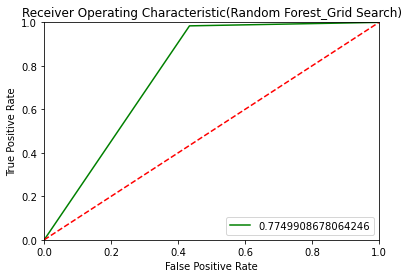

In [92]:
plt.title('Receiver Operating Characteristic(Random Forest_Grid Search)') 
plt.plot(fpr, tpr, 'g', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

## Logistic Regression

In [93]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
# Checking Accuracy on Logistic Regression
prediction_train2 = LogReg.predict(X_train)
acc3 = accuracy_score(y_train,prediction_train2)
prediction_test2 = LogReg.predict(X_test)
acc4 = accuracy_score(y_test,prediction_test2)
print("Accuracy on train data is: ", acc3)
print("Accuracy on test data is: ", acc4)

Accuracy on train data is:  0.9901231764772663
Accuracy on test data is:  0.9994357779066193


In [95]:
# Confusion matrix for Logistic Regression
confusion_matrix(y_test,prediction_test2)

array([[256600,     80],
       [    65,    246]], dtype=int64)

In [96]:
# Classification report for Logistic Regression
print(classification_report(y_test,prediction_test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.75      0.79      0.77       311

    accuracy                           1.00    256991
   macro avg       0.88      0.90      0.89    256991
weighted avg       1.00      1.00      1.00    256991



In [97]:
# AUC, Recall, Precision & F1 score for Logistic Regression
AUC2 = roc_auc_score(y_test, prediction_test2)
print('AUC on Logistic Regression is:',AUC2)
recall2 = recall_score(y_test, prediction_test2)
print('recall on Logistic Regression is:',recall2)
precision2 = precision_score(y_test, prediction_test2)
print('precision on Logistic Regression is:',precision2)
f1_score2 = f1_score(y_test, prediction_test2)
print('f1_score on Logistic Regression is:',f1_score2)

AUC on Logistic Regression is: 0.8953425562224939
recall on Logistic Regression is: 0.7909967845659164
precision on Logistic Regression is: 0.754601226993865
f1_score on Logistic Regression is: 0.7723704866562009


In [98]:
# True Positive & False positive rate
fpr , tpr , z = metrics.roc_curve(y_test , prediction_test2)
auc2 = metrics.auc(fpr,tpr)
print(auc2)
print(fpr)
print(tpr)

0.8953425562224939
[0.00000000e+00 3.11672121e-04 1.00000000e+00]
[0.         0.79099678 1.        ]


# ROC Plot

Text(0.5, 1.0, 'Receiver Operating Characteristic(Logistic Regression)')

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

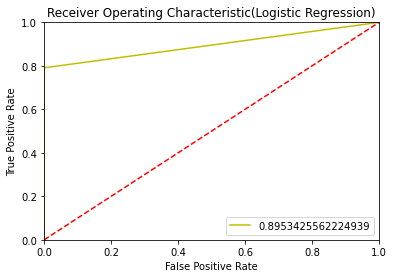

In [99]:
plt.title('Receiver Operating Characteristic(Logistic Regression)') 
plt.plot(fpr, tpr, 'y', label = auc2) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# Using K-Fold cross validation on Logistic Regression

In [100]:
classifier=(LogisticRegression())
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)


C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

[0.96642626 0.97241978 0.98499115 0.99308825 0.99517513 0.99584293
 0.99686133 0.99661091 0.99707832 0.99766265]
0.9896156712093426


C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Type I & Type II errors at different thresholds

In [101]:
y_pred_probability = LogReg.predict_proba(X_test)
print("   class : 0  class: 1  ")
print(y_pred_probability)

   class : 0  class: 1  
[[1.00000000e+00 2.32493101e-10]
 [9.99263744e-01 7.36256100e-04]
 [9.98709809e-01 1.29019052e-03]
 ...
 [9.99396719e-01 6.03280795e-04]
 [1.00000000e+00 2.46409799e-10]
 [9.99999999e-01 1.42247541e-09]]


In [102]:
y_pred_class=[]
for value in y_pred_probability[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [103]:
for a in np.arange(0,1,0.01):
    probability = np.where(y_pred_probability[:,1] > a, 1, 0)
    conf_mat=confusion_matrix(y_test, probability)
    total_errors=conf_mat[0,1]+conf_mat[1,0] 
    print("Errors at threshold ", a, ":",total_errors, " , type 2 : ", 
        conf_mat[1,0]," , type 1 : ", conf_mat[0,1])

Errors at threshold  0.0 : 256680  , type 2 :  0  , type 1 :  256680
Errors at threshold  0.01 : 41503  , type 2 :  52  , type 1 :  41451
Errors at threshold  0.02 : 28732  , type 2 :  53  , type 1 :  28679
Errors at threshold  0.03 : 21316  , type 2 :  55  , type 1 :  21261
Errors at threshold  0.04 : 16301  , type 2 :  57  , type 1 :  16244
Errors at threshold  0.05 : 13491  , type 2 :  59  , type 1 :  13432
Errors at threshold  0.06 : 11483  , type 2 :  60  , type 1 :  11423
Errors at threshold  0.07 : 9801  , type 2 :  60  , type 1 :  9741
Errors at threshold  0.08 : 8370  , type 2 :  60  , type 1 :  8310
Errors at threshold  0.09 : 7184  , type 2 :  60  , type 1 :  7124
Errors at threshold  0.1 : 6199  , type 2 :  61  , type 1 :  6138
Errors at threshold  0.11 : 5339  , type 2 :  61  , type 1 :  5278
Errors at threshold  0.12 : 4632  , type 2 :  61  , type 1 :  4571
Errors at threshold  0.13 : 4029  , type 2 :  61  , type 1 :  3968
Errors at threshold  0.14 : 3503  , type 2 :  61 

# ADABoost Classifier

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
adb = AdaBoostClassifier(n_estimators=30, learning_rate=0.05)
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=30, random_state=None)

In [106]:
# Checking Accuracy on ADABoost Classifier
prediction_train_adb = adb.predict(X_train)
acc_adb = accuracy_score(y_train,prediction_train_adb)
prediction_test_adb = adb.predict(X_test)
acc_adb2 = accuracy_score(y_test,prediction_test_adb)
print("Accuracy on train data is: ", acc_adb)
print("Accuracy on test data is: ", acc_adb2)

Accuracy on train data is:  0.9633208565256153
Accuracy on test data is:  0.9987937320762206


In [107]:
# Confusion matrix for ADABoost Classifier
confusion_matrix(y_test,prediction_test_adb)

array([[256680,      0],
       [   310,      1]], dtype=int64)

In [288]:
# Classification report for ADABoost Classifier
print(classification_report(y_test,prediction_test_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.00      0.01       311

    accuracy                           1.00    256991
   macro avg       1.00      0.50      0.50    256991
weighted avg       1.00      1.00      1.00    256991



In [289]:
# AUC, Recall, Precision & F1 score for ADABoost Classifier
AUC3 = roc_auc_score(y_test, prediction_test_adb)
print('AUC on Logistic Regression is:',AUC3)
recall3 = recall_score(y_test, prediction_test_adb)
print('recall on Logistic Regression is:',recall3)
precision3 = precision_score(y_test, prediction_test_adb)
print('precision on Logistic Regression is:',precision3)
f1_score3 = f1_score(y_test, prediction_test_adb)
print('f1_score on Logistic Regression is:',f1_score3)

AUC on Logistic Regression is: 0.5016077170418006
recall on Logistic Regression is: 0.003215434083601286
precision on Logistic Regression is: 1.0
f1_score on Logistic Regression is: 0.00641025641025641


In [290]:
# True Positive & False positive rate
fpr , tpr , z = metrics.roc_curve(y_test , prediction_test_adb)
auc3 = metrics.auc(fpr,tpr)
print(auc3)
print(fpr)
print(tpr)

0.5016077170418006
[0. 0. 1.]
[0.         0.00321543 1.        ]


# ROC Plot

Text(0.5, 1.0, 'Receiver Operating Characteristic(ADABoost Classifier)')

(0, 1)

(0, 1)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

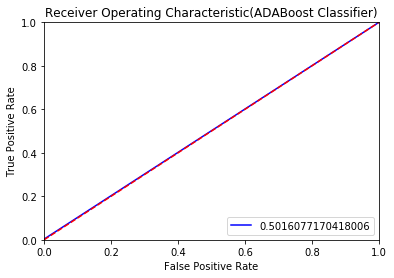

In [291]:
plt.title('Receiver Operating Characteristic(ADABoost Classifier)') 
plt.plot(fpr, tpr, 'b', label = auc3) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# GradientBoost Algorithm

In [292]:
from sklearn.ensemble import GradientBoostingClassifier

In [293]:
gb = GradientBoostingClassifier(max_depth=3, n_estimators=30, learning_rate=0.05)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [294]:
# Checking Accuracy on GradientBoostingClassifier
prediction_train_gb = gb.predict(X_train)
acc_gb = accuracy_score(y_train,prediction_train_gb)
prediction_test_gb = gb.predict(X_test)
acc_gb2 = accuracy_score(y_test,prediction_test_gb)
print("Accuracy on train data is: ", acc_gb)
print("Accuracy on test data is: ", acc_gb2)

Accuracy on train data is:  0.9708887471660061
Accuracy on test data is:  0.9979843652112331


In [295]:
# Confusion matrix for GradientBoostingClassifier
confusion_matrix(y_test,prediction_test_gb)

array([[256234,    446],
       [    72,    239]], dtype=int64)

In [296]:
# AUC, Recall, Precision & F1 score for GradientBoostingClassifier
AUC4 = roc_auc_score(y_test, prediction_test_gb)
print('AUC on Logistic Regression is:',AUC4)
recall4 = recall_score(y_test, prediction_test_gb)
print('recall on Logistic Regression is:',recall4)
precision4 = precision_score(y_test, prediction_test_gb)
print('precision on Logistic Regression is:',precision4)
f1_score4 = f1_score(y_test, prediction_test_gb)
print('f1_score on Logistic Regression is:',f1_score4)

AUC on Logistic Regression is: 0.8833755869532647
recall on Logistic Regression is: 0.7684887459807074
precision on Logistic Regression is: 0.34890510948905107
f1_score on Logistic Regression is: 0.47991967871485947


In [297]:
# True Positive & False positive rate
fpr , tpr , z = metrics.roc_curve(y_test , prediction_test_gb)
auc4 = metrics.auc(fpr,tpr)
print(auc3)
print(fpr)
print(tpr)

0.5016077170418006
[0.         0.00173757 1.        ]
[0.         0.76848875 1.        ]


# ROC Plot

Text(0.5, 1.0, 'Receiver Operating Characteristic(GradientBoostingClassifier)')

(0, 1)

(0, 1)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

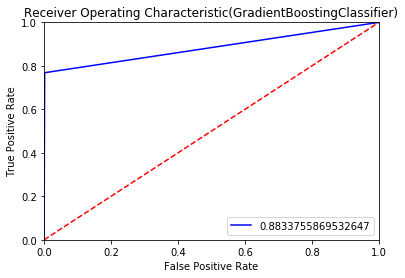

In [298]:
plt.title('Receiver Operating Characteristic(GradientBoostingClassifier)') 
plt.plot(fpr, tpr, 'b', label = auc4) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# Conclusion:

<html>
<head>
<style>
table {
  border-collapse: collapse;
  width: 100%;
}
  
th {
  font-weight: bold;
  font-size:20vw;
  color:MediumSeaGreen;
}

td {
  text-align: centre;
  padding: 0px;
}

</style>
</head>
<body>
<div style="overflow-x:auto;">
  <table>
    <tr>
      <th><font size="4" color="#ff0000">Algorithm</font></font></th>
      <th><font size="4" color="#ff0000">Accuracy(Train)</font></font></th>
      <th><font size="4" color="#ff0000">Accuracy(Test)</font></font></th>
      <th><font size="4" color="#ff0000">Recall</font></font></th>
      <th><font size="4" color="#ff0000">Precision</font></font></th>
      <th><font size="4" color="#ff0000">f1 Score</font></font></th>
      <th><font size="4" color="#ff0000">AUC</font></font></th>
    </tr>
    <tr>
      <td><font size="2">Random Forest</font></td>
      <td>0.9994</td>
      <td>0.4719</td>
      <td>0.9935</td>
      <td>0.0022</td>
      <td>0.0045</td>
      <td>0.7324</td>
    </tr>
    <tr>
      <td><font size="2">Random Forest(Grid Search)</font></td>
      <td>0.9917</td>
      <td>0.7492</td>
      <td>0.9517</td>
      <td>0.0045</td>
      <td>0.0091</td>
      <td>0.8504</td>
    </tr>
    <tr>
      <td><font size="2">ADABoost</font></td>
      <td>0.9633</td>
      <td>0.9987</td>
      <td>0.0032</td>
      <td>1.0</td>
      <td>0.0064</td>
      <td>0.5016</td>
    </tr>
      <tr>
      <td><font size="4" color="#0000FF">Logistic Regression</font></td>
      <td><font size="4" color="#0000FF">0.9968</font></td>
      <td><font size="4" color="#0000FF">0.9994</font></td>
      <td><font size="4" color="#0000FF">0.7974</font></td>
      <td><font size="4" color="#0000FF">0.7675</font></td>
      <td><font size="4" color="#0000FF">0.8336</font></td>
      <td><font size="4" color="#0000FF">0.8986</font></td>
    </tr>
      <tr>
      <td><font size="2">GradientBoost</font></td>
      <td>0.9708</td>
      <td>0.9979</td>
      <td>0.7684</td>
      <td>0.3489</td>
      <td>0.4799</td>
      <td>0.8833</td>
    </tr>
  </table>
</div>

</body>
</html>